# Data Exploration Exercises

## Store Item Data

In [1]:
# imports
from acquire import get_store_data, get_germany
from prepare import prepare_germany, prepare_sales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
# get data
sales = prepare_sales(get_store_data())
sales.head(1)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92


I want to split the data so that train consists of all data before the final year and test consists of only the final year. First I need to see the timeframe of the whole dataset so I know where to split.

In [3]:
# print date range for full df
print(f'Date Range: {sales.index.min()} to {sales.index.max()}')

Date Range: 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00


In [4]:
# split data
train = sales[:'2016']
test = sales['2017']

<ipython-input-4-afa85c501dd9>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = sales['2017']


In [5]:
# view date range for train
train.index.min(), train.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2016-12-31 00:00:00+0000', tz='UTC'))

In [6]:
# view info
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730500 entries, 2013-01-01 00:00:00+00:00 to 2016-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    730500 non-null  float64
 1   sale_id        730500 non-null  int64  
 2   store_address  730500 non-null  object 
 3   store_city     730500 non-null  object 
 4   store_id       730500 non-null  int64  
 5   store_state    730500 non-null  object 
 6   store_zipcode  730500 non-null  int64  
 7   item_brand     730500 non-null  object 
 8   item_id        730500 non-null  int64  
 9   item_name      730500 non-null  object 
 10  item_price     730500 non-null  float64
 11  item_upc12     730500 non-null  int64  
 12  item_upc14     730500 non-null  int64  
 13  month          730500 non-null  object 
 14  day_of_week    730500 non-null  object 
 15  sales_total    730500 non-null  float64
dtypes: float64(3), int64(6), obj

In [7]:
# view descriptive stats
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sale_amount,730500.0,5.061023e+01,2.783096e+01,0.000000e+00,2.900000e+01,4.500000e+01,6.700000e+01,2.140000e+02
sale_id,730500.0,4.563180e+05,2.635604e+05,1.000000e+00,2.281595e+05,4.563180e+05,6.844765e+05,9.126350e+05
store_id,730500.0,5.500000e+00,2.872283e+00,1.000000e+00,3.000000e+00,5.500000e+00,8.000000e+00,1.000000e+01
store_zipcode,730500.0,7.822480e+04,1.647909e+01,7.820100e+04,7.821700e+04,7.822050e+04,7.823200e+04,7.825300e+04
item_id,730500.0,2.550000e+01,1.443088e+01,1.000000e+00,1.300000e+01,2.550000e+01,3.800000e+01,5.000000e+01
item_price,730500.0,5.160400e+00,2.737764e+00,6.000000e-01,2.970000e+00,5.195000e+00,7.520000e+00,9.640000e+00
item_upc12,730500.0,2.384688e+11,2.978005e+11,8.500005e+09,3.367410e+10,7.103651e+10,6.030842e+11,8.846237e+11
item_upc14,730500.0,2.384688e+11,2.978005e+11,8.500005e+09,3.367410e+10,7.103651e+10,6.030842e+11,8.846237e+11
sales_total,730500.0,2.720926e+02,2.202576e+02,0.000000e+00,9.554000e+01,2.262000e+02,3.898200e+02,1.903990e+03


In [8]:
# assign sales_total to variable
y = train.sales_total.resample('D').mean()
y.head()

sale_date
2013-01-01 00:00:00+00:00    147.68802
2013-01-02 00:00:00+00:00    147.14116
2013-01-03 00:00:00+00:00    156.33896
2013-01-04 00:00:00+00:00    168.93546
2013-01-05 00:00:00+00:00    175.24370
Freq: D, Name: sales_total, dtype: float64

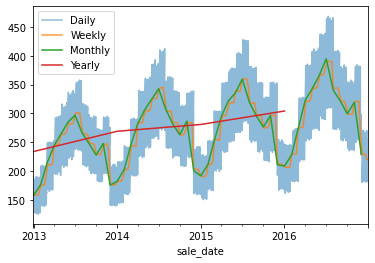

In [9]:
# plot sales_total data by different intervals
y.plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend();

<AxesSubplot:xlabel='sale_date'>

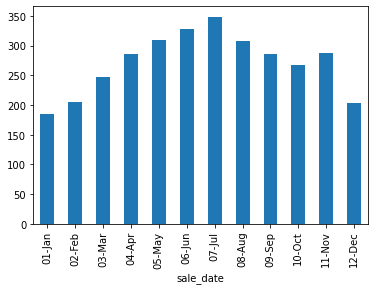

In [10]:
# view mean sales_total by month
train.groupby(train.index.strftime('%m-%b')).sales_total.mean().plot.bar()

<AxesSubplot:xlabel='month', ylabel='sales_total'>

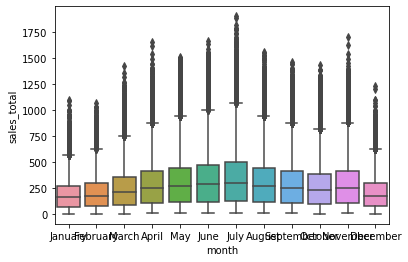

In [11]:
# view boxplots for monthly sales_total
sns.boxplot(data=train, x='month', y='sales_total')

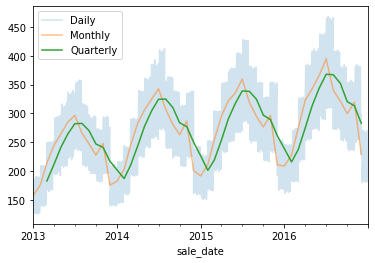

In [12]:
# plot moving averages
y.plot(alpha=.2, label='Daily')
y.resample('M').mean().rolling(1).mean().plot(alpha=.5, label='Monthly')
y.resample('M').mean().rolling(3).mean().plot(alpha=8, label='Quarterly')
plt.legend()

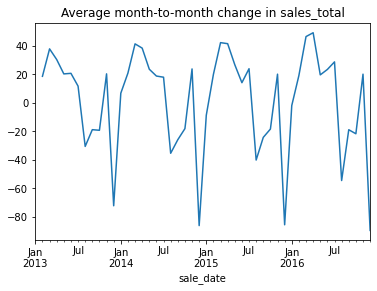

In [13]:
# plot month-to-month difference
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales_total');

<AxesSubplot:xlabel='sale_date'>

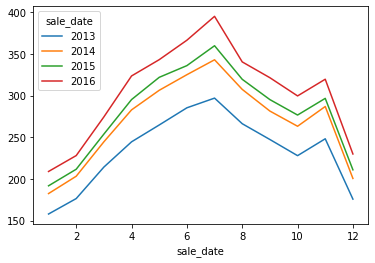

In [14]:
# view seasonal plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

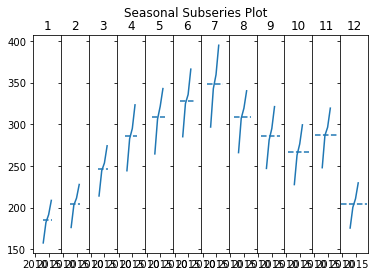

In [15]:
# view seasonal subseries plot
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

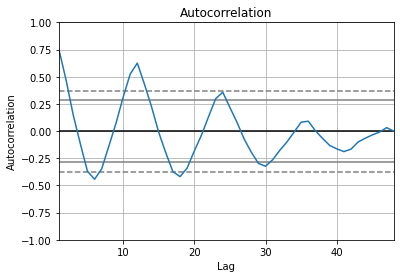

In [16]:
# view monthly autocorrelation plot
pd.plotting.autocorrelation_plot(y.resample('M').mean()).set(title='Autocorrelation');

---
## OPSD Data

In [17]:
germany = prepare_germany(get_germany())

In [18]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [19]:
germany.index.min(), germany.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [20]:
# split data so last year is test
train = germany[:'2016']
test = germany['2017']

<ipython-input-20-eed2aab8afe9>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = germany['2017']


In [21]:
# confirm date range of train
train.index.min(), train.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2016-12-31 00:00:00'))

In [22]:
# confirm date range for test
test.index.min(), test.index.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

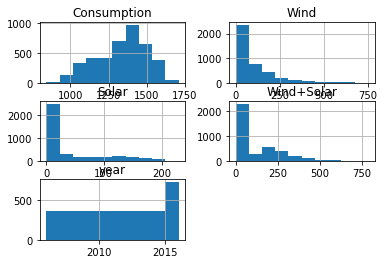

In [23]:
# view distributions
train.hist();

In [24]:
# view info
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2006-01-01 to 2016-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4018 non-null   float64
 1   Wind         4018 non-null   float64
 2   Solar        4018 non-null   float64
 3   Wind+Solar   4018 non-null   float64
 4   month        4018 non-null   object 
 5   year         4018 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 219.7+ KB


In [25]:
# view summary stats
train.describe()

,Consumption,Wind,Solar,Wind+Solar,year
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,1334.663967,94.223499,39.675306,113.928578,2011.000747
std,165.301876,123.296864,58.080244,152.222007,3.162868
min,842.395000,0.000000,0.000000,0.000000,2006.000000
25%,1214.792500,0.000000,0.000000,0.000000,2008.000000
50%,1363.080000,51.038000,0.000000,0.000000,2011.000000
75%,1454.684250,141.614250,71.323500,216.614750,2014.000000
max,1709.568000,751.656000,229.714000,783.936000,2016.000000


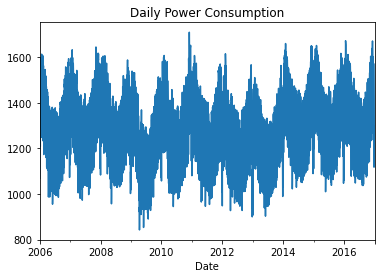

In [43]:
# assign consumption to y
y = train.Consumption
# plot y
y.plot(title='Daily Power Consumption');

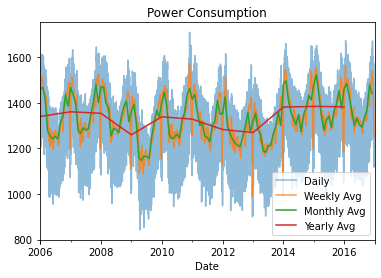

In [38]:
# view resampled data
ax = y.plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly Avg')
y.resample('M').mean().plot(ax=ax, label='Monthly Avg')
y.resample('Y').mean().plot(label='Yearly Avg')
plt.legend()
plt.title('Power Consumption');

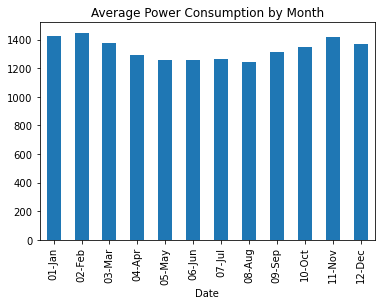

In [42]:
# plot mean consumption by month
y.groupby(train.index.strftime('%m-%b')).mean().plot.bar(title='Average Power Consumption by Month');

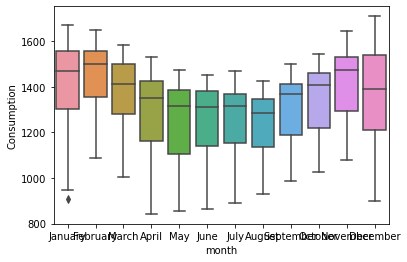

In [41]:
# view boxplot for monthly averages
sns.boxplot(data = train, x = 'month', y = 'Consumption');

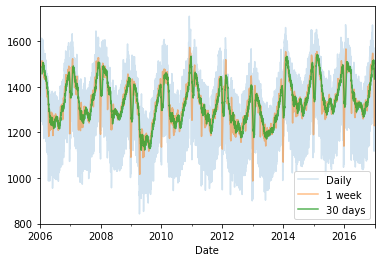

In [44]:
# plot moving averages
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='1 week')
y.resample('D').mean().rolling(30).mean().plot(alpha=.8, label='30 days')
plt.legend();

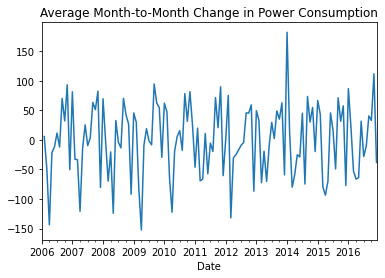

In [45]:
# plot monthly differences
y.resample('M').mean().diff().plot(title='Average Month-to-Month Change in Power Consumption');

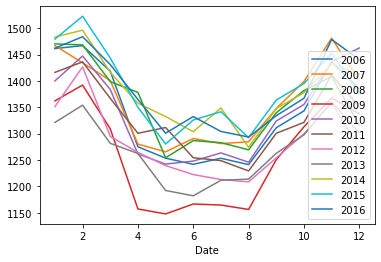

In [47]:
# view seasonal plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.legend(loc='lower right');